In [56]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
#import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [57]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated.csv', encoding="utf-8")

In [58]:
#data.dtypes

In [59]:
data['x']=data['left']+","+data['middle_part']+","+data['right_part']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data11

,x
0,"1529366400000, 1529452800000, 1532304000000, ..."
1,"1532304000000, 1533686400000, 1533859200000, ..."
2,"1480982400000, 1481673600000, 1481846400000, ..."
3,"1478649600000, 1480032000000, 1480896000000, ..."
4,"1486512000000, 1487635200000, 1489363200000, ..."


In [60]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
#data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]

,first_x
0,"1529366400000, 1529452800000, 1532304000000, ..."
1,
2,
3,
4,"1529366400000, 1529452800000, 1532304000000, ..."


In [61]:
newx = data3["first_x"].str.split(",", n =8, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])

In [62]:
data3

,first_x,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8
0,"1529366400000, 1529452800000, 1532304000000, ...",1.529366e+12,1.529453e+12,1.532304e+12,1.532304e+12,1.533514e+12,1.534291e+12,1.534291e+12,1.536710e+12,1.540426e+12
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1529366400000, 1529452800000, 1532304000000, ...",1.529366e+12,1.529453e+12,1.532304e+12,1.532304e+12,1.533514e+12,1.534291e+12,1.534291e+12,1.536710e+12,1.540426e+12


In [63]:
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,xx,Value
0,"1529366400000, 1529452800000, 1532304000000, ...",x_0,1.529366e+12
4,"1529366400000, 1529452800000, 1532304000000, ...",x_0,1.529366e+12
5,"1529366400000, 1529452800000, 1532304000000, ...",x_1,1.529453e+12
9,"1529366400000, 1529452800000, 1532304000000, ...",x_1,1.529453e+12
14,"1529366400000, 1529452800000, 1532304000000, ...",x_2,1.532304e+12
10,"1529366400000, 1529452800000, 1532304000000, ...",x_2,1.532304e+12
15,"1529366400000, 1529452800000, 1532304000000, ...",x_3,1.532304e+12
19,"1529366400000, 1529452800000, 1532304000000, ...",x_3,1.532304e+12
24,"1529366400000, 1529452800000, 1532304000000, ...",x_4,1.533514e+12
20,"1529366400000, 1529452800000, 1532304000000, ...",x_4,1.533514e+12


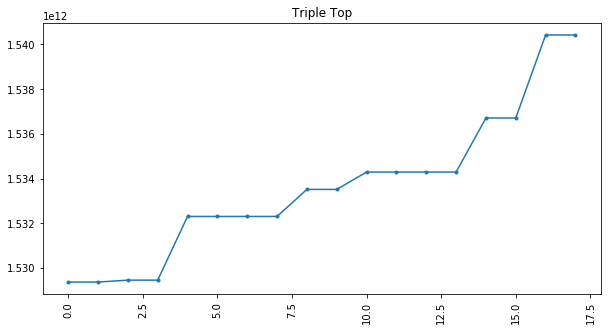

In [64]:
data3["xx"].value_counts()
graph_x = data3['Value'][0:18].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Triple Top")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

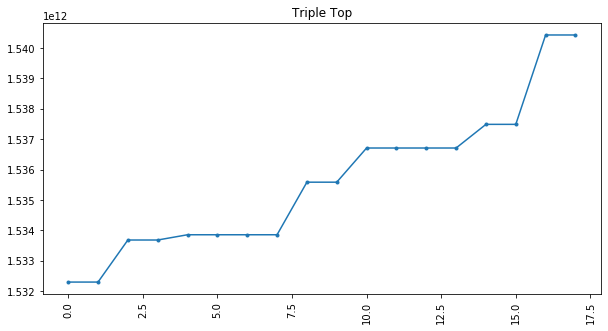

In [69]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated.csv', encoding="utf-8")
data['x']=data['left']+","+data['middle_part']+","+data['right_part']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
#data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =8, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
#data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:18].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Triple Top")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

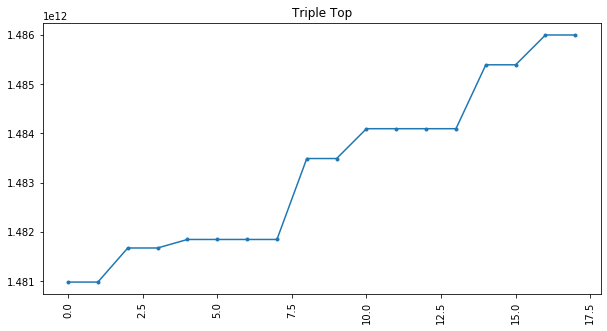

In [72]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated.csv', encoding="utf-8")
data['x']=data['left']+","+data['middle_part']+","+data['right_part']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
#data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =8, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
#data3
data3["xx"].value_counts()
graph_x = data3['Value'][0:18].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Triple Top")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

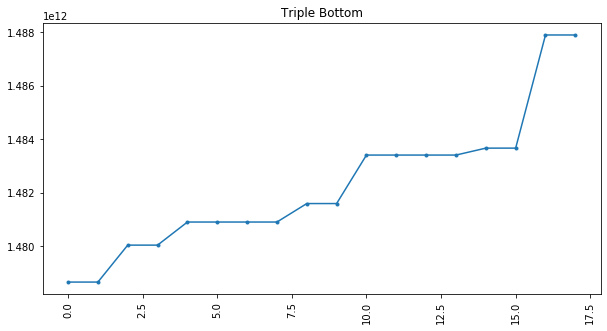

In [73]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated.csv', encoding="utf-8")
data['x']=data['left']+","+data['middle_part']+","+data['right_part']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Top\\Triple_Top_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
#data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =8, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:18].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Triple Bottom")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()

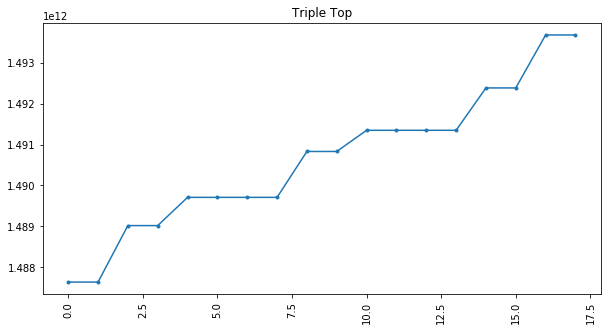

In [74]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Bottom\\Triple_Bottom_updated.csv', encoding="utf-8")
data['x']=data['left']+","+data['middle_part']+","+data['right_part']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Bottom\\Triple_Bottom_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Triple_Bottom\\Triple_Bottom_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][4]
#data2["first_y"] = data2["y"][4]
data2["first_x"][1:4] = ""
#data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x'])
data3
#data2['comma_count'] = data2.x.str.count(',')
#data2['comma_count'][0]
newx = data3["first_x"].str.split(",", n =8, expand = True)
#newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3["x_5"] = pd.to_numeric(newx[5])
data3["x_6"] = pd.to_numeric(newx[6])
data3["x_7"] = pd.to_numeric(newx[7])
data3["x_8"] = pd.to_numeric(newx[8])
data3 = data3.melt(id_vars = ["first_x"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][0:18].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Triple Top")
plt.xticks(rotation=90)
plt.plot(graph_x,marker=".")
plt.show()